In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("earthquake_data.csv")
df

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,NaN,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",NaN,NaN
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10-01-2001 16:02,5,7,NaN,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,NaN
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,09-01-2001 16:49,0,7,NaN,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",NaN,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,01-01-2001 08:54,0,5,NaN,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,"Mindanao, Philippines",NaN,NaN


In [3]:
df.isna().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64

In [4]:
## Memeriksa dataset 
print(f'Number of records (rows) in the dataset are: {df.shape[0]}')
print(f'Number of features (columns) in the dataset are: {df.shape[1]}')
print(f'Number of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'Number missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 782
Number of features (columns) in the dataset are: 19
Number of duplicate entries in the dataset are: 0
Number missing values in the dataset are: 1246


In [5]:
data = df[['latitude', 'longitude', 'magnitude', 'magType', 'depth', 'nst', 'gap', 'alert']]
data

,latitude,longitude,magnitude,magType,depth,nst,gap,alert
0,-9.7963,159.596,7.0,mww,14.000,117,17.0,green
1,-4.9559,100.738,6.9,mww,25.000,99,34.0,green
2,-20.0508,-178.346,7.0,mww,579.000,147,18.0,green
3,-19.2918,-172.129,7.3,mww,37.000,149,21.0,green
4,-25.5948,178.278,6.6,mww,624.464,131,27.0,green
...,...,...,...,...,...,...,...,...
777,13.0490,-88.660,7.7,mwc,60.000,427,0.0,NaN
778,56.7744,-153.281,6.9,mw,36.400,0,0.0,NaN
779,-14.9280,167.170,7.1,mwb,103.000,372,0.0,NaN
780,6.6310,126.899,6.8,mwc,33.000,64,0.0,NaN


In [6]:
dt= data.dropna()
dt

,latitude,longitude,magnitude,magType,depth,nst,gap,alert
0,-9.7963,159.596,7.0,mww,14.000,117,17.0,green
1,-4.9559,100.738,6.9,mww,25.000,99,34.0,green
2,-20.0508,-178.346,7.0,mww,579.000,147,18.0,green
3,-19.2918,-172.129,7.3,mww,37.000,149,21.0,green
4,-25.5948,178.278,6.6,mww,624.464,131,27.0,green
...,...,...,...,...,...,...,...,...
416,-28.0940,-70.653,6.8,mww,45.000,596,19.3,green
423,13.9880,-91.895,7.4,mww,24.000,751,25.5,yellow
440,0.8020,92.463,8.2,mwc,25.100,341,14.9,green
441,2.3270,93.063,8.6,mw,20.000,499,16.6,yellow


In [7]:
dt.isna().sum()

latitude     0
longitude    0
magnitude    0
magType      0
depth        0
nst          0
gap          0
alert        0
dtype: int64

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 507
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   415 non-null    float64
 1   longitude  415 non-null    float64
 2   magnitude  415 non-null    float64
 3   magType    415 non-null    object 
 4   depth      415 non-null    float64
 5   nst        415 non-null    int64  
 6   gap        415 non-null    float64
 7   alert      415 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 29.2+ KB


In [9]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding pada kolom 'magType'
dt['magType'] = label_encoder.fit_transform(dt['magType'])

# Melakukan label encoding pada kolom 'alert'
dt['alert'] = label_encoder.fit_transform(dt['alert'])

# dt = dt.astype(int)

# Memilih hanya kolom-kolom numerik
numeric_columns = dt.select_dtypes(include=[np.number])

# Deteksi outliers menggunakan Z-score pada kolom numerik
z_scores = stats.zscore(numeric_columns)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
print("Outliers berdasarkan Z-Score:")
print(dt[filtered_entries])

Outliers berdasarkan Z-Score:
     latitude  longitude  magnitude  magType  depth  nst   gap  alert
0     -9.7963   159.5960        7.0        4   14.0  117  17.0      0
1     -4.9559   100.7380        6.9        4   25.0   99  34.0      0
2    -20.0508  -178.3460        7.0        4  579.0  147  18.0      0
3    -19.2918  -172.1290        7.3        4   37.0  149  21.0      0
7      7.6712   -82.3396        6.7        4   20.0  145  37.0      0
..        ...        ...        ...      ...    ...  ...   ...    ...
409  -10.9280   166.0180        7.1        4   21.0  334  16.5      0
410  -10.8380   165.9690        6.8        4   12.0  400  17.5      0
411  -10.9970   165.6550        6.7        4   11.0  387  26.5      0
412  -10.4990   165.5880        7.0        4    8.8  445  17.5      0
414  -10.7990   165.1140        8.0        4   24.0  460  20.9      0

[364 rows x 8 columns]


/var/folders/8v/syygv0_j37g5dmwnz3s0brrw0000gn/T/ipykernel_22567/1118817447.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['magType'] = label_encoder.fit_transform(dt['magType'])
/var/folders/8v/syygv0_j37g5dmwnz3s0brrw0000gn/T/ipykernel_22567/1118817447.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['alert'] = label_encoder.fit_transform(dt['alert'])


In [10]:
#deteksi outlier
def persentase_outlier(df):
    for kolom in df.columns:
        q1 = df[kolom].quantile(0.25)
        q3 = df[kolom].quantile(0.75)
        rentang_interkuartil = q3 - q1

        batas_atas = q3 + (rentang_interkuartil * 1.5)
        batas_bawah = q1 - (rentang_interkuartil * 1.5)

        persentase = (((len(df[df[kolom] > batas_atas])) +
                      (len(df[df[kolom] < batas_bawah]))) / len(df[kolom])) * 100

        print(f"{kolom} : {persentase:.2f} %")

In [11]:
#presentase outlier
persentase_outlier(dt)

latitude : 0.00 %
longitude : 0.00 %
magnitude : 4.34 %
magType : 3.61 %
depth : 13.98 %
nst : 14.70 %
gap : 6.51 %
alert : 21.69 %


In [12]:
def ganti_outlier_batas_ekstrim(st, kolom):
    q1 = st[kolom].quantile(0.25)
    q3 = st[kolom].quantile(0.75)
    rentang_interkuartil = q3 - q1

    batas_atas = q3 + (rentang_interkuartil * 1.5)
    batas_bawah = q1 - (rentang_interkuartil * 1.5)

    st[kolom].mask(st[kolom] > batas_atas, batas_atas, inplace=True)
    st[kolom].mask(st[kolom] < batas_bawah, batas_bawah, inplace=True)

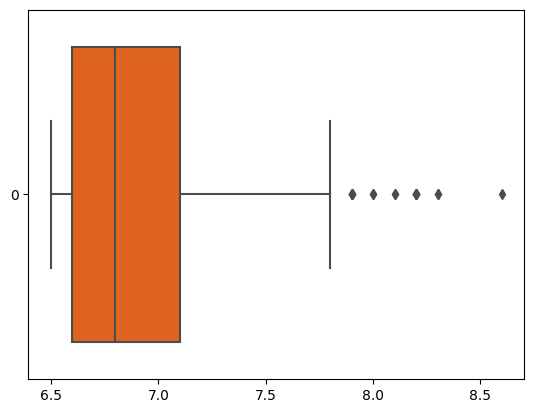

In [13]:
#replace outlier pada kolom pregnancies
sns.boxplot(dt['magnitude'], orient = 'h', color = '#FF5B00');

In [14]:
ganti_outlier_batas_ekstrim(dt,'magnitude')

/var/folders/8v/syygv0_j37g5dmwnz3s0brrw0000gn/T/ipykernel_22567/989073807.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st[kolom].mask(st[kolom] > batas_atas, batas_atas, inplace=True)
/var/folders/8v/syygv0_j37g5dmwnz3s0brrw0000gn/T/ipykernel_22567/989073807.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st[kolom].mask(st[kolom] < batas_bawah, batas_bawah, inplace=True)


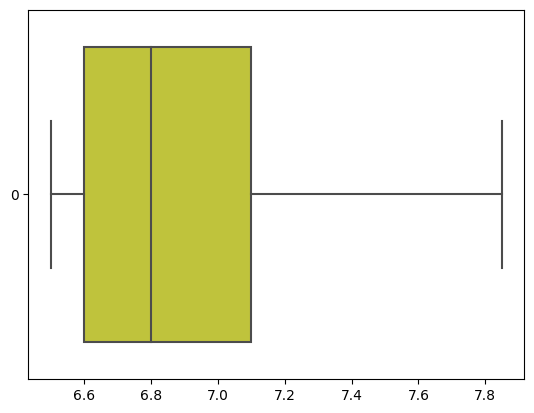

In [15]:
sns.boxplot(dt['magnitude'], orient = 'h', color = '#D4D925');

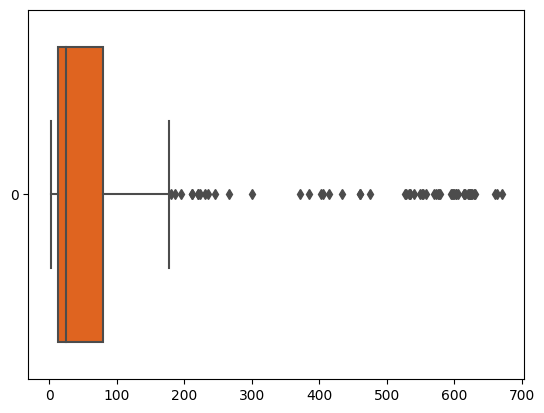

In [16]:
#replace outlier pada kolom pregnancies
sns.boxplot(dt['depth'], orient = 'h', color = '#FF5B00');

In [17]:
ganti_outlier_batas_ekstrim(dt,'depth')

/var/folders/8v/syygv0_j37g5dmwnz3s0brrw0000gn/T/ipykernel_22567/989073807.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st[kolom].mask(st[kolom] > batas_atas, batas_atas, inplace=True)
/var/folders/8v/syygv0_j37g5dmwnz3s0brrw0000gn/T/ipykernel_22567/989073807.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st[kolom].mask(st[kolom] < batas_bawah, batas_bawah, inplace=True)


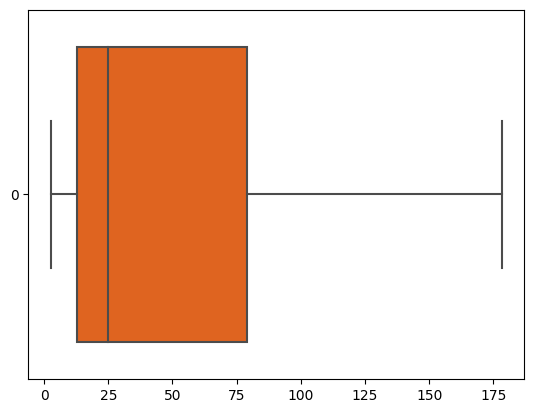

In [18]:
#replace outlier pada kolom pregnancies
sns.boxplot(dt['depth'], orient = 'h', color = '#FF5B00');

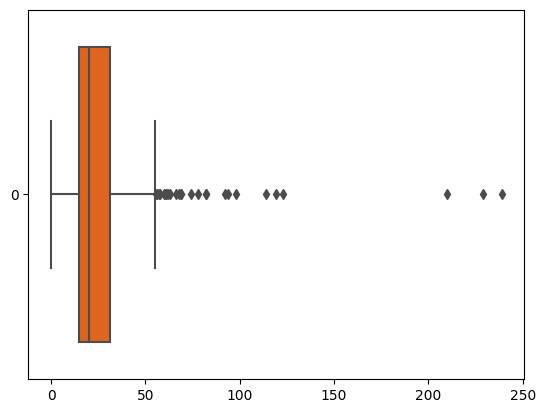

In [19]:
#replace outlier pada kolom pregnancies
sns.boxplot(dt['gap'], orient = 'h', color = '#FF5B00');

In [20]:
ganti_outlier_batas_ekstrim(dt,'gap')

/var/folders/8v/syygv0_j37g5dmwnz3s0brrw0000gn/T/ipykernel_22567/989073807.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st[kolom].mask(st[kolom] > batas_atas, batas_atas, inplace=True)
/var/folders/8v/syygv0_j37g5dmwnz3s0brrw0000gn/T/ipykernel_22567/989073807.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st[kolom].mask(st[kolom] < batas_bawah, batas_bawah, inplace=True)


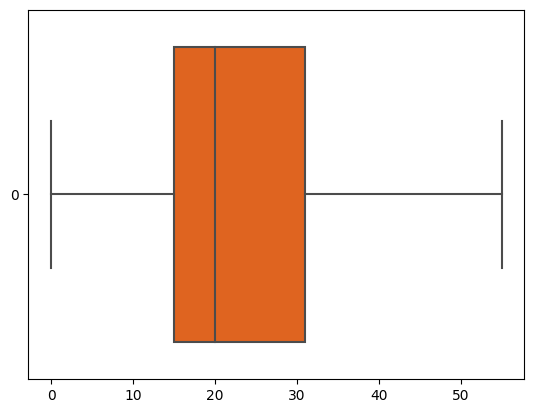

In [21]:
#replace outlier pada kolom pregnancies
sns.boxplot(dt['gap'], orient = 'h', color = '#FF5B00');

In [22]:
from sklearn.preprocessing import StandardScaler

#split dataset menjadi variabel x dan y
x = dt.iloc[:,:-1]
y = dt['alert']

#normalisasi data dengan standartscaler menjadi skala 0-1
sc = StandardScaler()
x_scaled  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [23]:
x_scaled

,latitude,longitude,magnitude,magType,depth,nst,gap
0,-0.374921,0.973224,0.263032,0.181898,-0.693701,0.510171,-0.550910
1,-0.207412,0.505608,0.004363,0.181898,-0.510907,0.379569,0.734449
2,-0.729790,-1.711663,0.263032,0.181898,2.036698,0.727842,-0.475300
3,-0.703524,-1.662270,1.039040,0.181898,-0.311496,0.742353,-0.248472
4,-0.921647,1.121649,-0.771645,0.181898,2.036698,0.611751,0.205184
...,...,...,...,...,...,...,...
410,-1.008135,-0.856062,-0.254306,0.181898,-0.178555,3.985646,-0.377008
411,0.448165,-1.024826,1.297709,0.181898,-0.527525,5.110278,0.091770
412,-0.008153,0.439865,2.461721,-1.858307,-0.509245,2.135446,-0.709689
413,0.044621,0.444632,2.461721,-5.938718,-0.593995,3.281845,-0.581154


0    325
3     56
1     22
2     12
Name: alert, dtype: int64


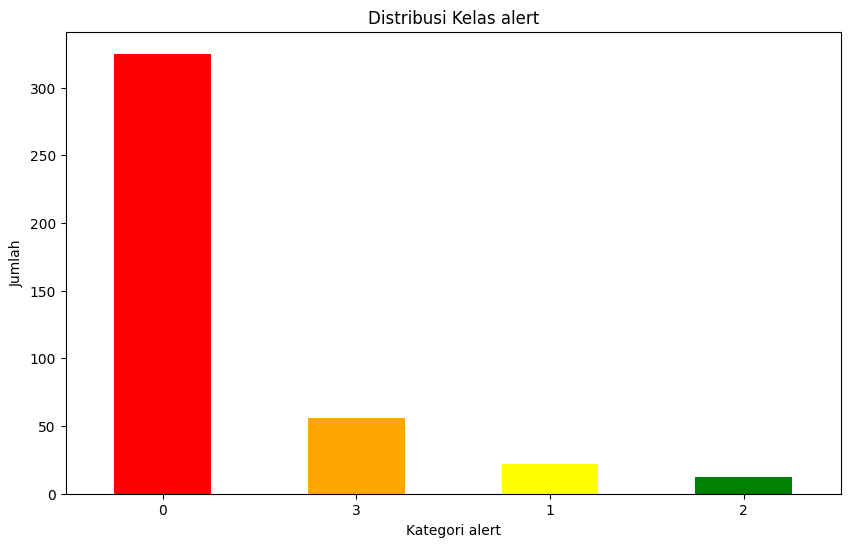

In [24]:
# Melihat distribusi setiap kelas 
alert_distribution = y.value_counts()
print(alert_distribution)

# Visualisasi distribusi kelas
plt.figure(figsize=(10, 6))
alert_distribution.plot(kind='bar', color=['red', 'orange', 'yellow', 'green', 'white'])
plt.title('Distribusi Kelas alert')
plt.xlabel('Kategori alert')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

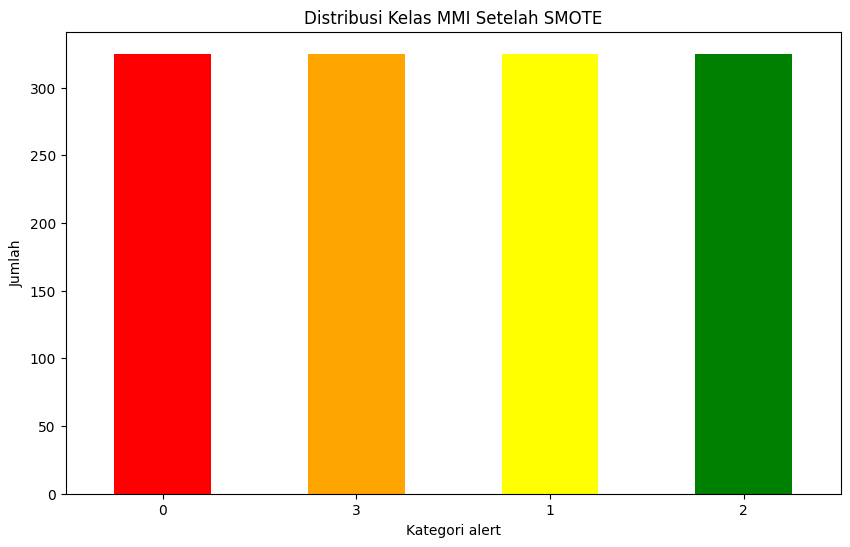

In [25]:
from imblearn.over_sampling import SMOTE

# Terapkan SMOTE pada data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_scaled, y)

# Buat DataFrame baru dengan data resampled
df_resampled = X_resampled.copy()
df_resampled['alert'] = y_resampled

# Visualisasikan distribusi kelas setelah SMOTE
plt.figure(figsize=(10, 6))
y_resampled.value_counts().plot(kind='bar', color=['red', 'orange', 'yellow', 'green'])
plt.title('Distribusi Kelas MMI Setelah SMOTE')
plt.xlabel('Kategori alert')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [26]:
df_resampled

,latitude,longitude,magnitude,magType,depth,nst,gap,alert
0,-0.374921,0.973224,0.263032,0.181898,-0.693701,0.510171,-0.550910,0
1,-0.207412,0.505608,0.004363,0.181898,-0.510907,0.379569,0.734449,0
2,-0.729790,-1.711663,0.263032,0.181898,2.036698,0.727842,-0.475300,0
3,-0.703524,-1.662270,1.039040,0.181898,-0.311496,0.742353,-0.248472,0
4,-0.921647,1.121649,-0.771645,0.181898,2.036698,0.611751,0.205184,0
...,...,...,...,...,...,...,...,...
1295,0.394116,-0.828012,1.453613,-0.637874,-0.536427,4.865385,0.001641,3
1296,-0.194530,0.925560,2.461721,0.181898,0.675085,-0.338745,-0.867023,3
1297,-0.115268,-0.858243,1.580250,0.181898,1.478825,-0.338745,-0.714090,3
1298,0.743544,-0.683190,-0.610355,0.181898,0.007761,-0.338745,1.329541,3


In [27]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model
model1 = RandomForestClassifier(random_state=42)

# Latih model dengan data training
model1.fit(X_train, y_train)

# Prediksi dengan data testing
y_pred = model1.predict(X_test)

In [51]:
# Evaluasi kinerja model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9461538461538461
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.93      0.93      0.93        73
           2       0.98      0.98      0.98        64
           3       0.91      0.93      0.92        55

    accuracy                           0.95       260
   macro avg       0.95      0.95      0.95       260
weighted avg       0.95      0.95      0.95       260

Confusion Matrix:
[[64  2  0  2]
 [ 2 68  1  2]
 [ 0  0 63  1]
 [ 1  3  0 51]]


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model regresi logistik
model2 = LogisticRegression(max_iter=1000, random_state=42)

# Latih model dengan data training
model2.fit(X_train, y_train)

# Prediksi dengan data testing
y_pred2 = model2.predict(X_test)

# Evaluasi model
accuracy2 = accuracy_score(y_test, y_pred2)
classification_report2 = classification_report(y_test, y_pred2)
confusion_matrix2 = confusion_matrix(y_test, y_pred2)

# Cetak hasil evaluasi
print("Model: Logistic Regression")
print(f"Accuracy: {accuracy2}")
print("Classification Report:")
print(classification_report2)
print("Confusion Matrix:")
print(confusion_matrix2)


Model: Logistic Regression
Accuracy: 0.6384615384615384
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72        68
           1       0.64      0.56      0.60        73
           2       0.70      0.81      0.75        64
           3       0.45      0.44      0.44        55

    accuracy                           0.64       260
   macro avg       0.63      0.63      0.63       260
weighted avg       0.63      0.64      0.63       260

Confusion Matrix:
[[49  8  3  8]
 [ 7 41 11 14]
 [ 0  5 52  7]
 [13 10  8 24]]


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model Decision Tree
model3 = DecisionTreeClassifier(random_state=42)

# Latih model dengan data training
model3.fit(X_train, y_train)

# Prediksi dengan data testing
y_pred3 = model3.predict(X_test)

# Evaluasi model
accuracy3 = accuracy_score(y_test, y_pred3)
classification_report3 = classification_report(y_test, y_pred3)
confusion_matrix3 = confusion_matrix(y_test, y_pred3)

# Cetak hasil evaluasi
print("Model: Decision Tree")
print(f"Accuracy: {accuracy3}")
print("Classification Report:")
print(classification_report3)
print("Confusion Matrix:")
print(confusion_matrix3)


Model: Decision Tree
Accuracy: 0.8346153846153846
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        68
           1       0.80      0.84      0.82        73
           2       0.93      0.89      0.91        64
           3       0.74      0.82      0.78        55

    accuracy                           0.83       260
   macro avg       0.84      0.83      0.83       260
weighted avg       0.84      0.83      0.84       260

Confusion Matrix:
[[54  8  0  6]
 [ 4 61  3  5]
 [ 0  2 57  5]
 [ 4  5  1 45]]


In [48]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model SVM
model4 = SVC(random_state=42)

# Latih model dengan data training
model4.fit(X_train, y_train)

# Prediksi dengan data testing
y_pred4 = model4.predict(X_test)

# Evaluasi model
accuracy4 = accuracy_score(y_test, y_pred4)
classification_report4 = classification_report(y_test, y_pred4)
confusion_matrix4 = confusion_matrix(y_test, y_pred4)

# Cetak hasil evaluasi
print("Model: Support Vector Machine")
print(f"Accuracy: {accuracy4}")
print("Classification Report:")
print(classification_report4)
print("Confusion Matrix:")
print(confusion_matrix4)


Model: Support Vector Machine
Accuracy: 0.8576923076923076
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        68
           1       0.85      0.82      0.83        73
           2       0.93      0.98      0.95        64
           3       0.81      0.76      0.79        55

    accuracy                           0.86       260
   macro avg       0.85      0.86      0.85       260
weighted avg       0.86      0.86      0.86       260

Confusion Matrix:
[[58  3  1  6]
 [ 6 60  4  3]
 [ 0  0 63  1]
 [ 5  8  0 42]]


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model K-Nearest Neighbors
model5 = KNeighborsClassifier()

# Latih model dengan data training
model5.fit(X_train, y_train)

# Prediksi dengan data testing
y_pred5 = model5.predict(X_test)

# Evaluasi model
accuracy5 = accuracy_score(y_test, y_pred5)
classification_report5 = classification_report(y_test, y_pred5)
confusion_matrix5 = confusion_matrix(y_test, y_pred5)

# Cetak hasil evaluasi
print("Model: K-Nearest Neighbors")
print(f"Accuracy: {accuracy5}")
print("Classification Report:")
print(classification_report5)
print("Confusion Matrix:")
print(confusion_matrix5)


Model: K-Nearest Neighbors
Accuracy: 0.8884615384615384
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86        68
           1       0.85      0.92      0.88        73
           2       0.93      1.00      0.96        64
           3       0.81      0.87      0.84        55

    accuracy                           0.89       260
   macro avg       0.89      0.89      0.89       260
weighted avg       0.90      0.89      0.89       260

Confusion Matrix:
[[52  6  1  9]
 [ 1 67  3  2]
 [ 0  0 64  0]
 [ 0  6  1 48]]


In [50]:
# Evaluasi kinerja model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9461538461538461
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.93      0.93      0.93        73
           2       0.98      0.98      0.98        64
           3       0.91      0.93      0.92        55

    accuracy                           0.95       260
   macro avg       0.95      0.95      0.95       260
weighted avg       0.95      0.95      0.95       260

Confusion Matrix:
[[64  2  0  2]
 [ 2 68  1  2]
 [ 0  0 63  1]
 [ 1  3  0 51]]


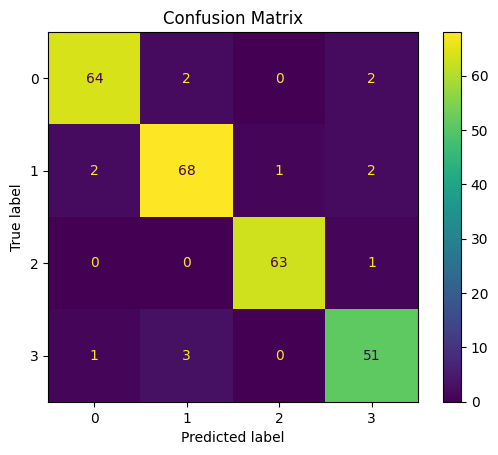

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix')
plt.show()

In [32]:
import joblib

# Menyimpan model ke file
joblib.dump(model1, 'RandomForest2_model.pkl')

['RandomForest2_model.pkl']

#### Tanpa Resampling 

In [33]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training dan testing set
x_train, x_test, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model
model = RandomForestClassifier(random_state=42)

# Latih model dengan data training
model.fit(x_train, ytrain)

# Prediksi dengan data testing
ypred = model.predict(x_test)

In [35]:
# Evaluasi kinerja model
print("Accuracy:", accuracy_score(ytest, ypred))
print("Classification Report:")
print(classification_report(ytest, ypred))
print("Confusion Matrix:")
print(confusion_matrix(ytest, ypred))

Accuracy: 0.7951807228915663
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        64
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         2
           3       0.60      0.25      0.35        12

    accuracy                           0.80        83
   macro avg       0.35      0.31      0.31        83
weighted avg       0.72      0.80      0.74        83

Confusion Matrix:
[[63  0  0  1]
 [ 4  0  0  1]
 [ 2  0  0  0]
 [ 8  0  1  3]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.